### Tuning Cascade Classifiers

**detectMultiScale**(input image, **Scale Factor** , **Min Neighbors**)

- **Scale Factor**
specifies how much we reduce the image size each time we scale. E.g. in face detection we typically use 1.3. This means we reduce the image by 30% each time it’s scaled. Smaller values, like 1.05 will take longer to compute, but will increase the rate of detection.



- **Min Neighbors**
specifies the number of neighbors each potential window should have in order to consider it a positive detection. Typically set between 3-6. 
It acts as sensitivity setting, low values will sometimes detect multiples faces over a single face. High values will ensure less false positives, but you may miss some faces.  

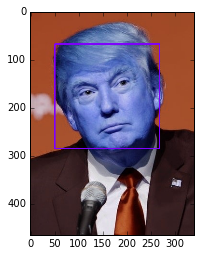

In [1]:
% matplotlib inline
import cv2
import matplotlib.pyplot as plt

face_classifier = cv2.CascadeClassifier('cascade-classifier/haarcascade_frontalface_default.xml')

image = cv2.imread('img/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is ():
    print("No faces found")

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)

plt.imshow(image)

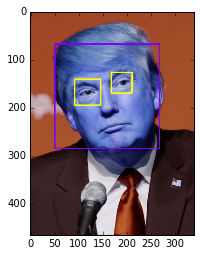

In [2]:
% matplotlib inline
import cv2
import matplotlib.pyplot as plt
 
face_classifier = cv2.CascadeClassifier('cascade-classifier/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('cascade-classifier/haarcascade_eye.xml')
 
img = cv2.imread('img/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is (): # when no faces detected, face_classifier returns and empty tuple
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (255,255,0), 2)

plt.imshow(img)